In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 24 14:29:31 2022

@author: samy
"""

import shap
from shap.plots import waterfall, beeswarm, text


import time
import copy
import pickle
import pickle5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
import copy

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from transformers import (AdamW, 
                          get_linear_schedule_with_warmup,
                          set_seed)

def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        data = pickle.load(file)
    return data

def load_pickle5(path_file):
    with open(path_file, 'rb') as file:
        data = pickle5.load(file)
    return data

In [3]:
root = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/'

# ||||||||||||||||||||||||||||||||||||||||||||||||||| CONTROVERSY - 0.73 |||||||||||||||||||||||||||||||||||||||||||||||||||

# ############################ BERT x TEXT (TEST) : *min-max()*

In [8]:
p = root + 'bert_text/shap_temp_TEST_ALL.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

   ---- (BERT) (TEST) mean ----


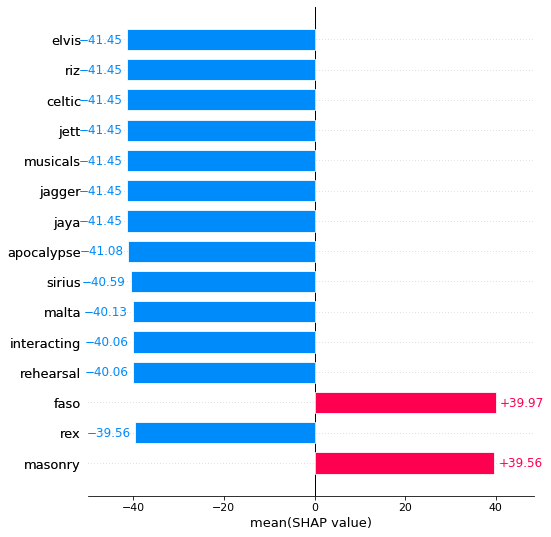

   ---- (BERT) (TEST) min (against-kavanaugh) ----


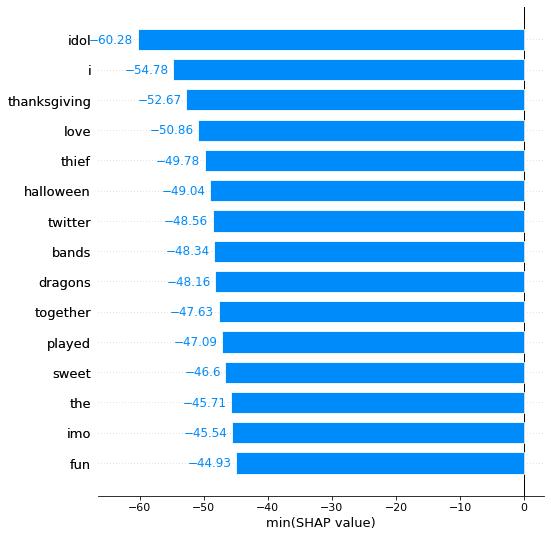

   ---- (BERT) (TEST) max (pro-kavanaugh) ----


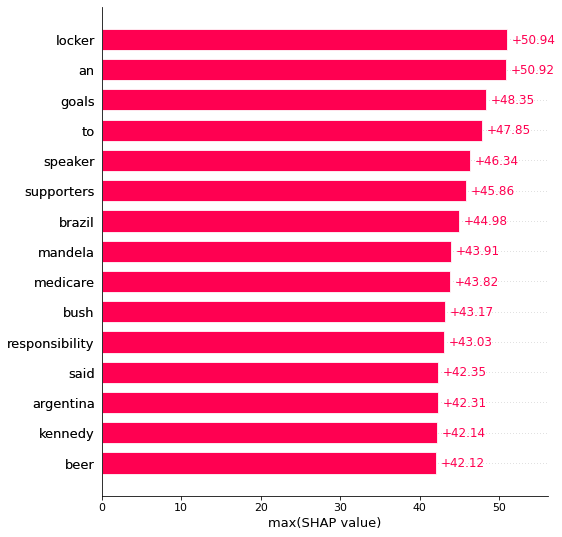

In [9]:
print('   ---- (BERT) (TEST) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) min (against-kavanaugh) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) max (pro-kavanaugh) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ BERT x TEXT (TEST) : *mean()*

   ---- (BERT) (TEST) mean ----


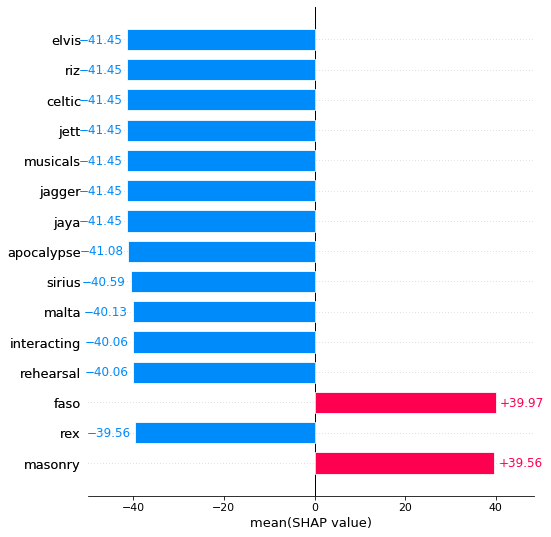

   ---- (BERT) (TEST) min (against) ----


   ---- (BERT) (TEST) max (pro) ----


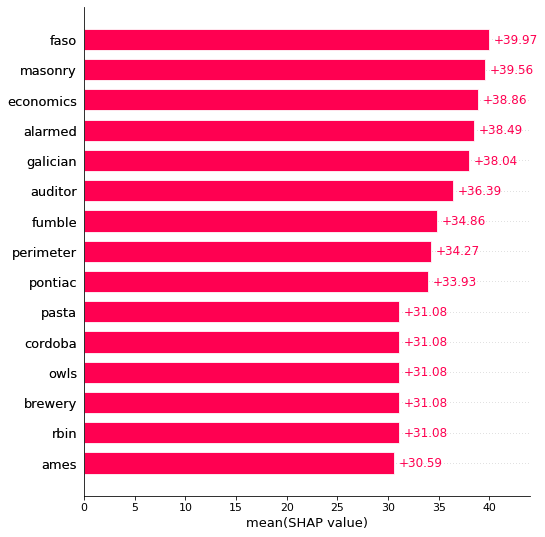

In [16]:
p = root + 'bert_text/shap_temp_TEST_ALL.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)
print('   ---- (BERT) (TEST) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) min (against) ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) max (pro) ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ BERT x TEXT (TRAIN)

In [11]:
p = root + 'bert_text/shap_temp_TRAIN_ALL.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

   ---- (BERT) (TRAIN) mean ----


   ---- (BERT) (TRAIN) min (against-kavanaugh) ----


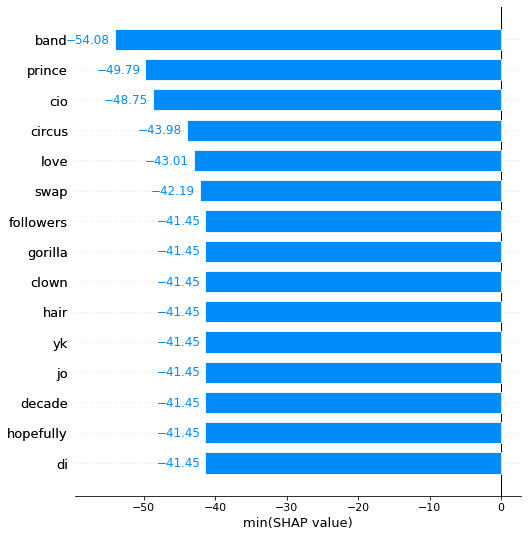

   ---- (BERT) (TRAIN) max (pro-kavanaugh) ----


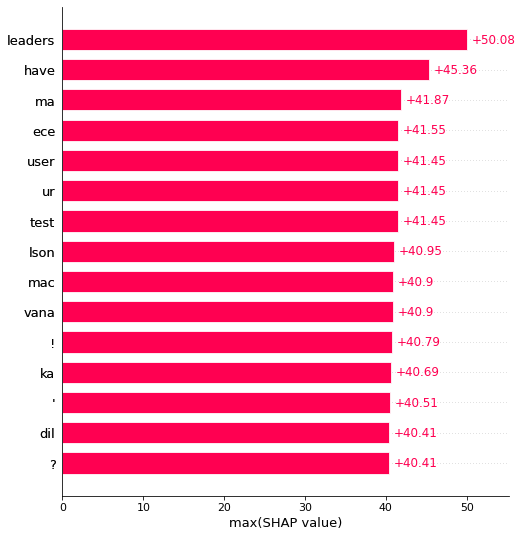

In [12]:
print('   ---- (BERT) (TRAIN) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TRAIN) min (against) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TRAIN) max (pro) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ BERT x TEXT (TEST - C): pelosi

In [17]:
p = root + 'bert_text/shap_temp_TEST_pelosi.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87     32117

    accuracy                           0.77     32117
   macro avg       0.50      0.38      0.43     32117
weighted avg       1.00      0.77      0.87     32117

7421 vs 24696


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [6]:
print('   ---- (BERT) (TEST) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) min (against) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) max (pro) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

   ---- (BERT) (TEST) mean ----


   ---- (BERT) (TEST) min (against) ----


   ---- (BERT) (TEST) max (pro) ----


# ############################ BERT x TEXT (TEST - NC): Thanksgiving

In [12]:
p = root + 'bert_text/shap_temp_TEST_Thanksgiving.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [0] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     35000
           1       0.00      0.00      0.00         0

    accuracy                           0.80     35000
   macro avg       0.50      0.40      0.45     35000
weighted avg       1.00      0.80      0.89     35000

28128 vs 6872


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


   ---- (BERT) (TEST) mean ----


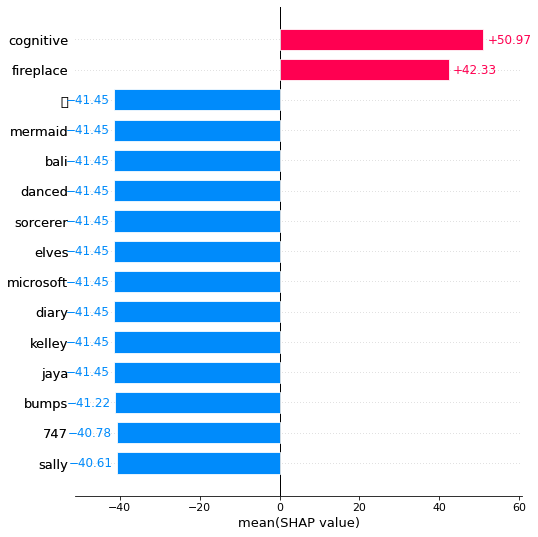

   ---- (BERT) (TEST) min (against) ----


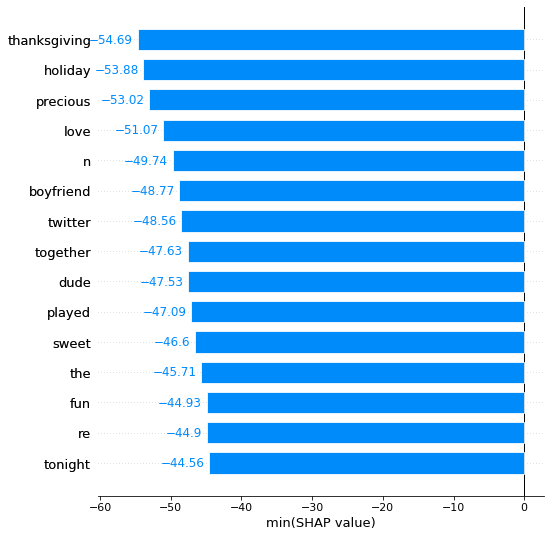

   ---- (BERT) (TEST) max (pro) ----


In [15]:
print('   ---- (BERT) (TEST) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) min (against) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) max (pro) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ BERT x TEXT (TEST - NC): messicumple

In [8]:
p = root + 'bert_text/shap_temp_TEST_messicumple.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [0] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       1.00      0.61      0.75     22047
           1       0.00      0.00      0.00         0

    accuracy                           0.61     22047
   macro avg       0.50      0.30      0.38     22047
weighted avg       1.00      0.61      0.75     22047

13354 vs 8693


   ---- (BERT) (TEST) mean ----


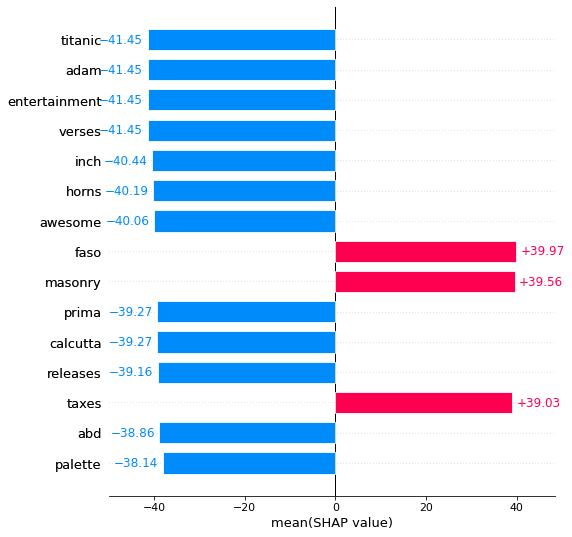

   ---- (BERT) (TEST) min (against) ----


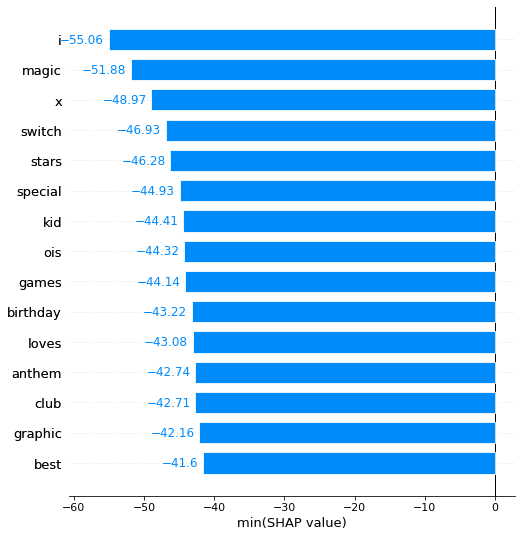

   ---- (BERT) (TEST) max (pro) ----


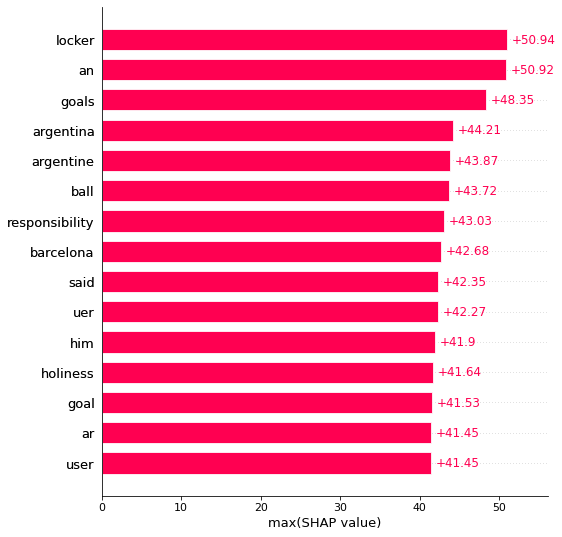

In [9]:
print('   ---- (BERT) (TEST) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) min (against) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TEST) max (pro) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ BERT x TEXT (TRAIN - C): kavanaugh16

In [10]:
p = root + 'bert_text/shap_temp_TRAIN_kavanaugh16.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.98     33028

    accuracy                           0.97     33028
   macro avg       0.50      0.48      0.49     33028
weighted avg       1.00      0.97      0.98     33028

1087 vs 31941


   ---- (BERT) (TRAIN) mean ----


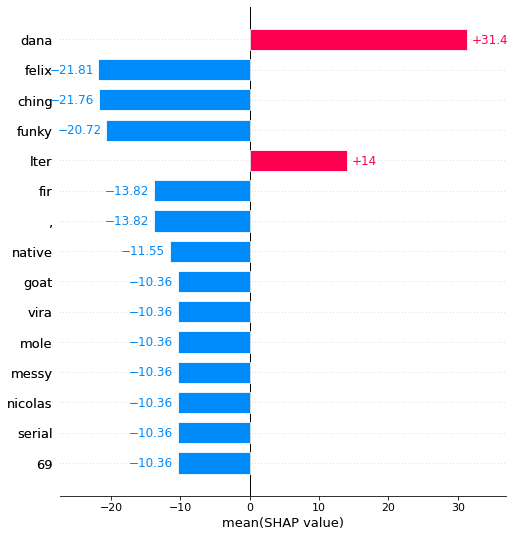

   ---- (BERT) (TRAIN) min (against-kavanaugh) ----


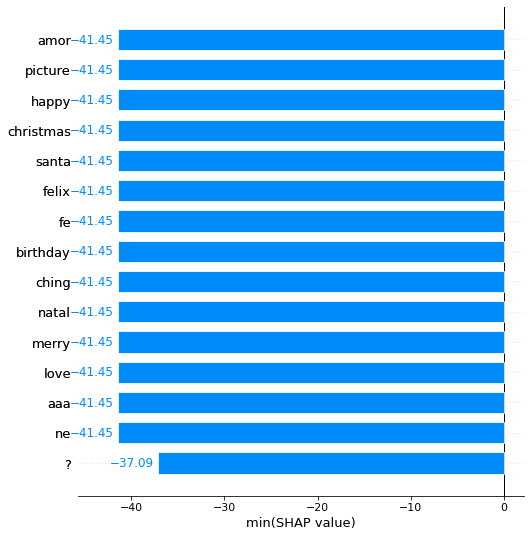

   ---- (BERT) (TRAIN) max (pro-kavanaugh) ----


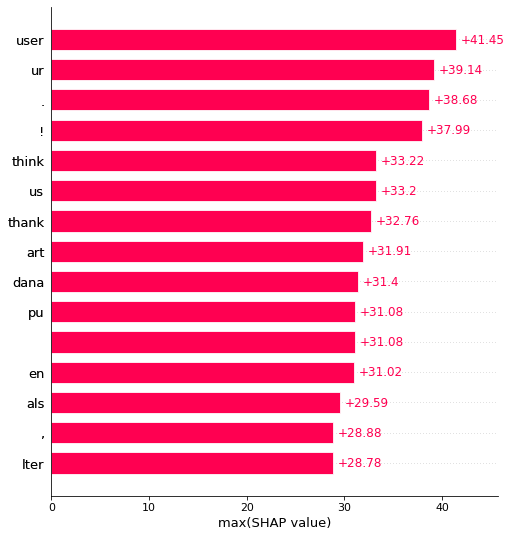

In [15]:
print('   ---- (BERT) (TRAIN) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TRAIN) min (against-kavanaugh) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TRAIN) max (pro-kavanaugh) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ BERT x TEXT (TRAIN - NC): feliznatal

In [13]:
p = root + 'bert_text/shap_temp_TRAIN_feliznatal.pickle'
shap_valuesC, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [0] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35000
           1       0.00      0.00      0.00         0

    accuracy                           1.00     35000
   macro avg       0.50      0.50      0.50     35000
weighted avg       1.00      1.00      1.00     35000

34950 vs 50


   ---- (BERT) (TRAIN) mean ----


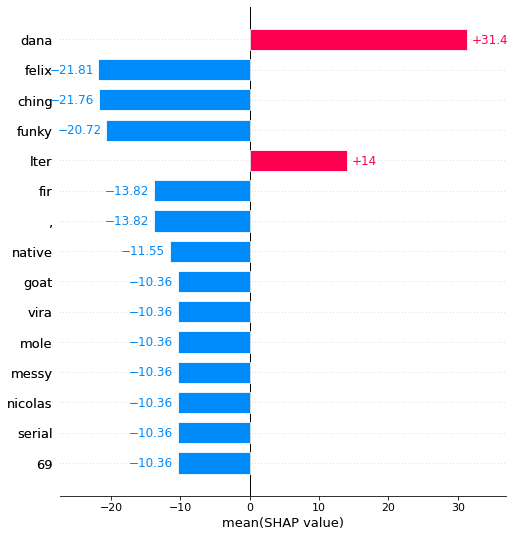

   ---- (BERT) (TRAIN) min (against-kavanaugh) ----


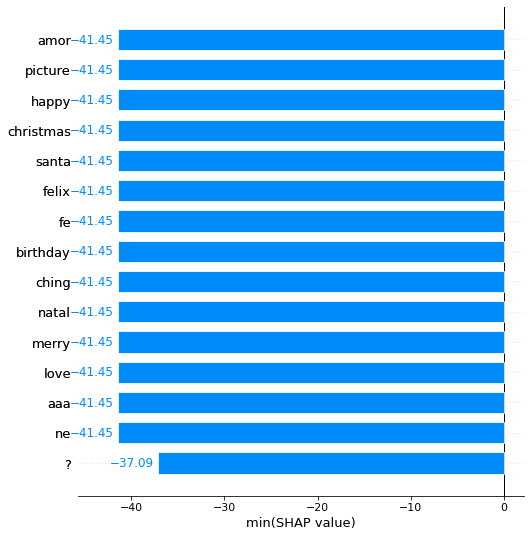

   ---- (BERT) (TRAIN) max (pro-kavanaugh) ----


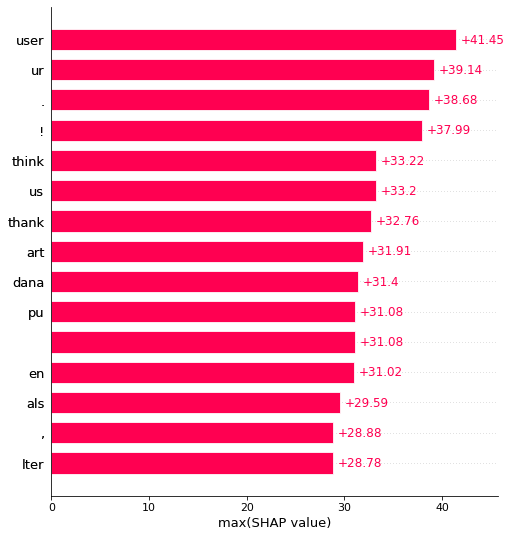

In [14]:
print('   ---- (BERT) (TRAIN) mean ----') #most common & most impact
shap.plots.bar(shap_valuesC.mean(0), max_display=15, rm_last=True)
print('   ---- (BERT) (TRAIN) min (against-kavanaugh) ----') #most common & most impact
shap.plots.bar(shap_valuesC.min(0), order = shap.Explanation.argsort, max_display=15, rm_last=True)
print('   ---- (BERT) (TRAIN) max (pro-kavanaugh) ----') #most common & most impact
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity, rm_last=True, max_display=15)

# ############################ RF x LIWC (TEST)

In [6]:
p = root + 'random_forest_liwc/shap_temp_TEST_ALL.pickle'
shap_values, samp_X, samp_y = load_pickle(p)

In [8]:
print('   ---- (BERT) (TEST) (RF x LIWC) mean ----') #most common & most impact
# shap.summary_plot(shap_valuesLIWC[1], sample_X, plot_type='bar', title="test_set")
shap.summary_plot(shap_values[1], samp_X, plot_type='violin', title="test_set")

   ---- (BERT) (TEST) (RF x LIWC) mean ----


# ############################ RF x LIWC (TRAIN)

# -------------- SHAP

   ---- (BERT) (TRAIN) (RF x LIWC) mean ----


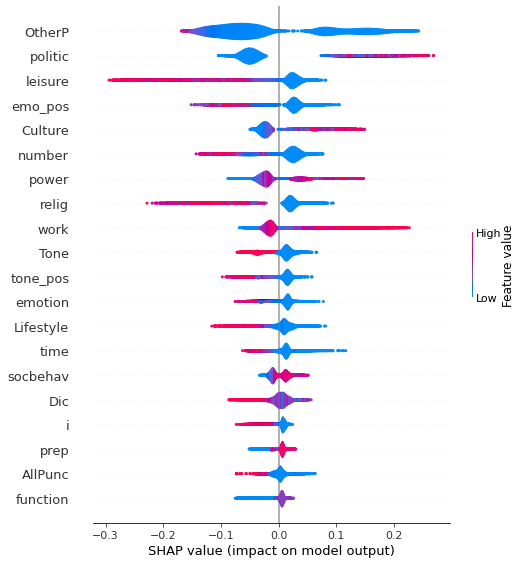

In [11]:
p = root + 'random_forest_liwc/shap_temp_TRAIN_ALL.pickle'
shap_values, samp_X, samp_y  = load_pickle(p)

print('   ---- (BERT) (TRAIN) (RF x LIWC) mean ----') #most common & most impact
shap.summary_plot(shap_values[1], samp_X, plot_type='violin', title="test_set")

# -------------- FEATURE IMPORTANCE

In [ ]:
import matplotlib.pyplot as plt
LIWC_FEATURES = ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron',
                 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 
                 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 
                 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 
                 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial', 'polite', 'conflict', 'moral', 
                 'comm', 'socrefs', 'family', 'friend', 'female', 'male', 'Culture', 'politic', 'ethnicity', 'tech', 'Lifestyle', 'leisure', 
                 'home', 'work', 'money', 'relig', 'Physical', 'health', 'illness', 'wellness', 'mental', 'substances', 'sexual', 'food', 'death',
                 'need', 'want', 'acquire', 'lack', 'fulfill', 'fatigue', 'reward', 'risk', 'curiosity', 'allure', 'Perception', 'attention', 
                 'motion', 'space', 'visual', 'auditory', 'feeling', 'time', 'focuspast', 'focuspresent', 'focusfuture', 'Conversation', 'netspeak', 
                 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'QMark', 'Exclam', 'Apostro', 'OtherP']
temp_path = root + ''
importance, clf = load_pickle(temp_path)

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

sorted_idx = clf.feature_importances_.argsort()
sorted_idx = sorted_idx[len(sorted_idx)-15:]

feats = np.array(LIWC_FEATURES)
plt.barh(feats[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("RF x LIWC Feature Importance")